<a href="https://colab.research.google.com/github/YenLinWu/Model_Drift/blob/dev/KL_and_JS_Divergence/KL_and_JS_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center' ><font size='70'>KL 散度與 JS 散度</font></div>

<center>      
About Author      
  
[![Linkedin](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/yenlinwu/)    [![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/YenLinWu)
</center>

# KL 與 JS 散度 - 介紹

<font color="#dddd00">KL 散度</font>(<font color="#dddd00">K</font>ullback-<font color="#dddd00">L</font>eibler Divergence, <font color="#dddd00">KL Divergence</font>)係用來度量兩個機率分佈 $P(x)$ 與 $Q(x)$ 相似度的一種統計距離(Statistical Distance)，其定義係以[信息熵(Information Entropy)](https://en.wikipedia.org/wiki/Entropy_(information_theory))為基礎，熵係可用來表達一個系統的混亂程度，熵的定義如下:  

$$ H \equiv -\sum_{i} P(x_i) \log\big(P(x_i)\big), $$
其中， $P(x_i)$ 表示事件 $x_i$ 的發生機率。 KL 散度的定義為一個[交叉熵(Cross Entropy)](https://en.wikipedia.org/wiki/Cross_entropy)減去一個信息熵，對於離散型隨機變數，兩機率分佈 $P$ 與 $Q$ 的 KL 散度定義如下 :  
$$ KL(P \parallel Q) = \sum_{i} P(i) \log\big(\frac{P(i)}{Q(i)}\big). $$

另外，對於連續型隨機變數，兩機率分佈 $P$ 與 $Q$ 的 KL 散度定義如下 : 
$$ KL(P \parallel Q) = \int P(x) \log\big(\frac{P(x)}{Q(x)}\big) dx. $$
從上列 KL 散度的定義中可知，當 KL 散度越小，則表示兩機率分佈 $P$ 與 $Q$ 越近似(相似)，也就是說，當以 $P$ 為基礎時， $Q$ 的機率分佈越近似於 $P$。
<br/> 
<br/>
從 KL 散度定義可明顯得知， KL 散度不具對稱性(Symmetric)，因此， KL 散度並非是一種可用來度量距離的[距離尺度]((https://en.wikipedia.org/wiki/Metric_space))。為了避免 KL 散度不具對稱性的情況，基於 KL 散度的基礎，我們定義出 <font color="#dddd00">JS 散度</font>(<font color="#dddd00">J</font>ensen-<font color="#dddd00">S</font>hannon Divergence, <font color="#dddd00">JS Divergence</font>):  
  
$$ JS(P \parallel Q) = \frac{KL(P \parallel M)+KL(Q \parallel M)}{2}, $$
其中，$M=(P+Q)/2$。同樣地，當 JS 散度越小，則也表示兩機率分佈 $P$ 與 $Q$ 越近似(相似)。






# KL 與 JS 散度 - 性質

1. $KL(P \parallel Q) \ge 0$；   
註: 此性質可藉由 [Jensen’s Inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality) 證明推得。  
  
2. $P=Q$  $\Leftrightarrow$  $KL(P \parallel Q)=0$；

3. $KL(Q \parallel P) \not= KL(P \parallel Q)$；
  
4. KL 散度不滿足三角不等式(Triangle Inequality)；

5. $0 \le JS(P \parallel Q) \le 1；$

6. $JS(Q \parallel P) = JS(P \parallel Q)$；  

7. KL 散度不屬於距離尺度， JS 散度為一距離尺度。

# Python 程式碼

下列我們將藉由鎳現金結算(Nickel Cash Settlement)的市場資料，示範如何運用 KL 散度與 JS 散度來衡量資料偏移。  

在去年俄烏戰爭爆發( 2022年 2月 24日 )的幾個交易天後，鎳現金結算發生了前所未見的暴漲，市場將此事件稱為「妖鎳事件」，相關報導請參閱 [一天暴漲超過100%！妖「鎳」衝破10萬美元，空頭大戶慘遭軋爆，交易所暫停交易](https://www.storm.mg/lifestyle/4229380)。因此，我們將使用 2021 年起每個交易日的鎳現金結算，觀察市場在「妖鎳事件」發生的前後，資料是否產生明顯的偏移現象?

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KL_and_JS_Divergence/Imgs/Nickel_Price_Trend.png">
</p>

* 資料來源: [Westmetall - Market data](https://www.westmetall.com/en/markdaten.php?action=table&field=LME_Ni_cash)

我們將使用滑動視窗來偵測資料是否偏移，滑動視窗的偵測方式為，固定滑動視窗 P、移動滑動視窗 Q，如下圖所示，藉此觀察 KL 散度與 JS 散度是否隨著時間的推移，而發生明顯不同的趨勢?

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KL_and_JS_Divergence/Imgs/Data_Drift_Detection_Instruction.png">
</p>

對於 2021 年起的鎳現金結算，藉由上述滑動視窗的偵測方式，下圖為偵測的結果。我們可清楚發現， KL 散度與 JS 散度在發生妖鎳事件的附近時間，其數值有明顯的增加，另外，在妖鎳事件之後，其數值的波動較事件發生前明顯的大。

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KL_and_JS_Divergence/Imgs/Data_Drift_Detection_in_KL_and_JS_Divergence.png">
</p>

## Step 1: 匯入套件

In [1]:
import sys
import os
import math
import datetime

import numpy as np
import pandas as pd
import scipy
from scipy.stats import entropy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
from PIL import Image

# 套件版本
print('Python Version:', sys.version[0:7]) 
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('SciPy Version:', scipy.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Python Version: 3.8.10 
Numpy Version: 1.21.6
Pandas Version: 1.3.5
SciPy Version: 1.7.3
Matplotlib Version: 3.2.2


## Step 2: 匯入資料  



In [2]:
# 資料讀取
file_name = r'Nickel_Market_Info.xlsx'
data_path = os.path.join(os.getcwd(), file_name)
data = pd.read_excel(data_path, sheet_name='LME_Market_Data')

# 字串型態的日期轉換成日期型態
data['date'] = pd.to_datetime(data['date'], format='%d. %B %Y')  

data

,date,LME Nickel Cash-Settlement,LME Nickel 3-month,LME Nickel stock
0,2023-02-16,25860,26000,45432
1,2023-02-15,25805,26060,46566
2,2023-02-14,26900,26900,46710
3,2023-02-13,26755,27000,47958
4,2023-02-10,27710,28060,48072
...,...,...,...,...
1544,2017-01-09,10245,10285,372012
1545,2017-01-06,10185,10240,370920
1546,2017-01-05,10230,10280,370920
1547,2017-01-04,9975,10025,371724


### Step 2-1: 視覺化

從 2017 年 1 月至 2023 年 2 月中旬的每個交易日，鎳現金結算的走勢圖:  

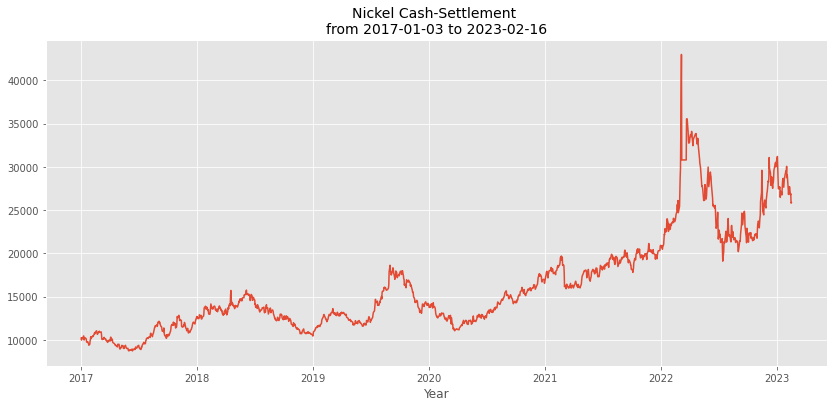

In [3]:
# 資料的起迄日
start_date = str(data['date'].iloc[-1].date()) 
end_date = str(data['date'].iloc[0].date()) 

# 趨勢圖
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['LME Nickel Cash-Settlement'])
plt.title('Nickel Cash-Settlement \nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year')
plt.savefig('Trend_of_Nickel_Cash_Settlement.png', bbox_inches='tight', format='png')
plt.show()

在上列趨勢圖中，加入國際重大事件的資訊:

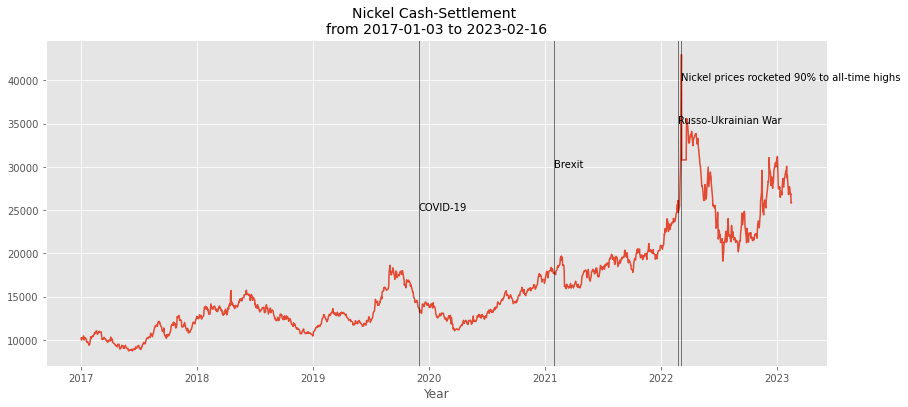

In [4]:
# 國際重大事件
events = pd.DataFrame({'date':[datetime.date(2019, 12, 1), datetime.date(2021, 1, 31), 
                               datetime.date(2022, 2, 24), datetime.date(2022, 3, 7)],
                       'event':['COVID-19', 'Brexit', 
                                'Russo-Ukrainian War', 'Nickel prices rocketed 90% to all-time highs']})

# 資料視覺化(包含國際重大事件)
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['LME Nickel Cash-Settlement'])

for i in range(len(events)):
    plt.axvline(x=events['date'][i], lw=0.5, color='black', linestyle='-')
    plt.annotate(str(events['event'][i]),  xy=(events['date'][i], 25000+i*5000))

plt.title('Nickel Cash-Settlement \nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year')
plt.show()

2021年起的每個交易日，鎳現金結算的走勢圖:

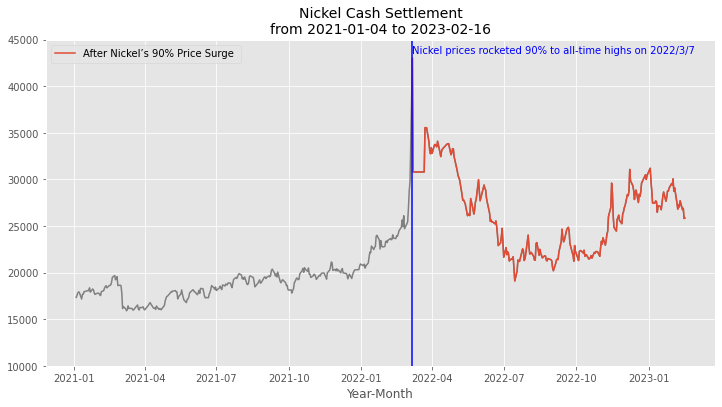

In [5]:
# 妖鎳事件(2022年 3月 7日)
event = pd.DataFrame({'date':[ datetime.date(2022, 3, 7)],
                      'event':['Nickel prices rocketed 90% to all-time highs']})
after_event = data['date'].dt.date>=datetime.date(2022, 3, 7)
data['after_event'] = after_event.values

# 2021 年起每個交易日的鎳現金結算
date_idx = data.index[data['date'].dt.year>=2021].sort_values(ascending=False)
dates = data.loc[date_idx, 'date']
cash_settlement = data.loc[date_idx, 'LME Nickel Cash-Settlement']

# 妖鎳事件發生後，每日交易日的鎳現金結算
after_event_date_idx = data.index[data['after_event']==True].sort_values(ascending=False)
after_event_dates = data.loc[after_event_date_idx, 'date']
after_event_cash_settlement = data.loc[after_event_date_idx, 'LME Nickel Cash-Settlement']
after_event_cash_settlement

# 資料起迄日期
start_date = str(dates[date_idx[0]].date())
end_date = str(dates[date_idx[-1]].date())

# 趨勢圖
plt.figure(figsize=(12,6))
plt.plot(dates, cash_settlement, color='gray')
plt.plot(after_event_dates, after_event_cash_settlement, label='After Nickel’s 90% Price Surge ')
plt.legend(loc=2)
plt.yticks(np.arange(10000, 50000, 5000))
plt.axvline(x=event['date'][0], lw=1.5, color='blue', linestyle='-')
plt.annotate('Nickel prices rocketed 90% to all-time highs on 2022/3/7', color='blue', xy=(event['date'][0], 43500))
plt.title('Nickel Cash Settlement\nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year-Month')
plt.show()

## Step 3: 計算 KL 散度與 JS 散度 

### Step 3-1: 定義函數  

有關 KL 散度與 JS 散度的計算， Python 程式碼執行的步驟如下:    

*   **Step 1**:  
透過 [Softmax 函數](https://en.wikipedia.org/wiki/Softmax_function)，將原始資料做尺度的縮放，從原始的尺度轉換到 $(0, 1)$ 區間中。經由轉換後，我們可將其每個轉換後的數值，視為原始數據的發生機率。 
*   **Step 2**:  
利用 SciPy 套件中的 [```scipy.stats.entropy()```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy-stats-entropy) 函數，定義用來計算 KL 散度與 JS 散度的函數。

定義 Softmax 轉換函數: 

In [12]:
def softmax(in_data):
    """
    Softmax 函數。 
    
    params:
        in_data (series): 資料集
        
    returns:
        out_data (series): 轉換後的資料集
    """

    scaled_in_data = in_data/10000
    out_data = (np.exp(scaled_in_data)/np.exp(scaled_in_data).sum())
    
    return out_data 

定義計算 KL 散度與 JS 散度的函數:

In [13]:
def calc_kl_div(p_prob, q_prob):
    """
    計算兩機率分布的 KL 散度(Kullback-Leibler Divergence)。 
    
    params:
        p_prob (series): 機率分布 P
        q_prob (series): 機率分布 Q
        
    returns:
        kl_divergence (float): KL 散度
    """

    if len(p_prob)!=len(q_prob):
        raise ValueError('兩機率分布的資料集長度須相同。')
    
    kl_divergence = scipy.stats.entropy(p_prob, q_prob)

    return kl_divergence

In [14]:
def calc_js_div(p_prob, q_prob):
    """
    計算兩機率分布的 JS 散度(Jensen-Shannon Divergence)。 
    
    params:
        p_prob (series): 機率分布 P
        q_prob (series): 機率分布 Q
        
    returns:
        js_divergence (float): JS 散度
    """

    if len(p_prob)!=len(q_prob):
        raise ValueError('兩機率分布的資料集長度須相同。')

    p_prob.reset_index(drop=True, inplace=True)
    q_prob.reset_index(drop=True, inplace=True)
    m = (p_prob + q_prob)/2
    js_divergence = (scipy.stats.entropy(p_prob, m)+scipy.stats.entropy(q_prob, m))/2

    return js_divergence

透過滑動視窗的方式，對時序資料進行 KL 散度與 JS 散度的計算，以偵測數據分布是否隨著時間，發生明顯的偏移:

In [15]:
def drift_detector(data, detect_col_name, sliding_window_size, shift_date_step=5, shift_p_threshold=np.nan):
    '''
    利用滑動視窗的方式，偵測時序資料是否發生數據飄移的現象。

    Args:
        data (dataframe): 資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        sliding_window_size (int): 滑動視窗的大小
        shift_date_step (int): 滑動視窗位移的步數，預設為 5
        shift_p_threshold (int): 若為 np.nan，則 P 的移動窗格固定不動。

    Returns:
        output_data (dataframe): 各時間點下的偵測結果。
    '''

    if not isinstance(data, pd.DataFrame):
        raise TypeError('data 參數的資料型態須為 pd.DataFrame。')

    date_idx = data.index
    
    # 建立空的 dataframe 用以儲存偵測結果
    output_data = pd.DataFrame(columns=['p_data', 'p_idx', 'p_date', 'q_data', 'q_idx', 'q_date',
                                        'p_prob', 'q_prob', 'kl_divergence', 'js_divergence', 'increment_count'])

    for iter_idx, i in enumerate(range(0, len(date_idx)-sliding_window_size+1, shift_date_step)):

        if iter_idx==0:               
            if not shift_p_threshold is np.nan:
                increment_count = 0
                shift_p_data = False

            # 篩選 P 的資料
            p_idx = date_idx[i:i+sliding_window_size]
            p_data = data.loc[p_idx, detect_col_name] # Series Type        

        else:  
            # 篩選 Q 的資料
            q_idx = date_idx[i:i+sliding_window_size]
            q_data = data.loc[q_idx, detect_col_name] # Series Type
            
            # 藉由 softmax 函數，進行資料轉換
            p_prob = softmax(p_data)
            q_prob = softmax(q_data)

            # 計算 KL 散度
            kl_divergence = calc_kl_div(p_prob, q_prob)

            # 計算 JS 散度
            js_divergence = calc_js_div(p_prob, q_prob)
            
            # 儲存計算結果與相關資訊
            output_data.loc[len(output_data.index)] = [p_data, p_idx, data.loc[p_idx, 'date'],
                                                       q_data, q_idx, data.loc[q_idx, 'date'],
                                                       p_prob, q_prob, kl_divergence, js_divergence, np.nan]
    
            if not shift_p_threshold is np.nan:
                # 紀錄 KL 散度連續遞增的次數
                if iter_idx==1:
                    output_data.at[len(output_data.index)-1, 'increment_count'] = 0

                else:
                    if shift_p_data is True:
                        output_data.at[len(output_data.index)-1, 'increment_count'] = 0
                        shift_p_data = False
                    
                    else:
                        previous_kl_divergence = output_data['kl_divergence'][iter_idx-2]

                        if kl_divergence>previous_kl_divergence:
                            increment_count += 1

                        else:
                            increment_count = 0    

                        output_data.at[len(output_data.index)-1, 'increment_count'] = increment_count
                      
                        if increment_count==shift_p_threshold:
                            p_idx = q_idx
                            p_data = q_data
                            increment_count = 0
                            shift_p_data = True

    output_data.index = output_data.index+1

    return output_data

繪製每個時間點偵測結果的視覺化:

In [16]:
def plot_output_image(detection_data, detect_col_name, detection_result, folder_name='output_imgs'):
    '''
    視覺化各時間點 KL 散度與 JS 散度的計算結果。

    Args:
        detection_data (dataframe): 待偵測的原始資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        detection_result (dataframe): 各時間點下的偵測結果
        folder_name (str): 儲存圖片的資料夾名稱

    Returns:
        對各時間點的偵測結果，將其視覺化且儲成圖片。
    '''    
    
    # 建立儲存圖片的資料夾
    img_folder = os.path.join(os.getcwd(), folder_name)
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)

    img_paths = []
    for i in list(detection_result.index):  
        
        current_kl_div = detection_result.loc[i, 'kl_divergence']
        current_js_div = detection_result.loc[i, 'js_divergence']
        p_data = detection_result.loc[i, 'p_data']
        q_data = detection_result.loc[i, 'q_data'] 
        p_prob = detection_result.loc[i, 'p_prob']
        q_prob = detection_result.loc[i, 'q_prob']
        p_date = detection_result.loc[i, 'p_date']
        q_date = detection_result.loc[i, 'q_date']
        p_start_date = str(list(p_date)[0].date())
        p_end_date = str(list(p_date)[-1].date())
        q_start_date = str(list(q_date)[0].date())
        q_end_date = str(list(q_date)[-1].date())
        idx_of_sliding_win = range(1, len(p_prob)+1)

        fig = plt.figure(figsize=(15, 10), constrained_layout=True)
        gs = gridspec.GridSpec(3, 2, figure=fig)

        ax1 = fig.add_subplot(gs[0, 0])
        y_upper_bound = round(detection_data[detect_col_name].max(), -3)

        ax1.plot(detection_data['date'], detection_data[detect_col_name], color='gray', alpha=0.5)
        ax1.fill_between(p_date, p_data, alpha=0.6, label='P: from '+p_start_date+' to '+p_end_date)
        ax1.fill_between(q_date, q_data, alpha=0.6, label='Q: from '+q_start_date+' to '+q_end_date)
        ax1.legend(loc=2)
        ax1.set_ylim([0, y_upper_bound*1.05])
        ax1.set_title('Nickel Cash Settlement')
        ax1.set_xlabel('Date')

        ax2 = fig.add_subplot(gs[0, 1])
        y_max = math.ceil(max(p_prob.max(), q_prob.max())*(10**3))/10**3 # 無條件進位到小數點後 3 位

        ax2.fill_between(idx_of_sliding_win, p_prob, alpha=0.6, label='P')
        ax2.fill_between(idx_of_sliding_win, q_prob, alpha=0.6, label='Q')
        ax2.legend(loc=2)
        ax2.set_ylim([0, y_max*1.5])
        ax2.set_title('Distribution of P and Q')
        ax2.set_xlabel('Index of Sliding Window')

        ax3 = fig.add_subplot(gs[1, :])
        ax3.plot(detection_result.loc[0:i, 'kl_divergence'], marker='o', color='green', 
                 markersize=1, alpha=0.25)        
        ax3.plot(i, detection_result.loc[i, 'kl_divergence'], marker='o', color='green', markersize=6,
                 label='KL Div.= '+str(round(current_kl_div, 6)))
        ax3.legend(loc=2, fontsize=12)

        if i<=50: 
            ax3.set_xticks(list(range(1, i+1)))
        else:
            ax3.set_xticks(list(range(1, i+1, 5)))

        ax3.set_xticklabels([])
        ax3.set_ylabel('KL Div.', color='green')
        plt.title('Kullback-Leibler and Jensen-Shannon Divergence', fontsize=16)
        
        ax4 = fig.add_subplot(gs[2, :])
        ax4.plot(detection_result.loc[0:i, 'js_divergence'], marker='o', color='blue', 
                 markersize=1, alpha=0.25)        
        ax4.plot(i, detection_result.loc[i, 'js_divergence'], marker='o', color='blue', markersize=6,
                 label='JS Div.= '+str(round(current_js_div, 6)))
        ax4.legend(loc=2, fontsize=12)

        if i<=50:
            ax4.set_xticks(list(range(1, i+1)))
            ax4.set_xticklabels(list(range(1, i+1)))
        else:
            ax4.set_xticks(list(range(1, i+1, 5)))
            ax4.set_xticklabels(list(range(1, i+1, 5)))

        ax4.set_xlabel('Iteration of Detection')
        ax4.set_ylabel('JS Div.', color='blue')

        # 儲存圖片
        img_path = os.path.join(img_folder, str(i)+'.png') 
        plt.savefig(img_path, bbox_inches='tight', format='png')
        img_paths.append(img_path)
        plt.show()

    return img_paths

In [17]:
def create_gif(img_paths, gif_name, gif_duration=100, gif_loop=3):
    '''
    製作 gif 檔。

    Args:
        img_paths (list): 每張圖片的路徑(包含檔名)
        gif_name (str): gif 檔的檔名(.gif)
        gif_duration (int): 每一禎的持續時間
        gif_loop (int): 動畫的重複次數
    '''    

    # 繪製 gif 檔
    Frames = []
    for img in img_paths: 
        frame = Image.open(img)
        Frames.append(frame)

    gif_path = os.path.join(os.getcwd(), gif_name)
    Frames[0].save(gif_path, save_all=True, append_images=Frames[1:], 
                   duration=gif_duration, loop=gif_loop)

### Step 3-2: 滑動視窗偵測數據飄移




In [18]:
# 篩選 2021 年後的資料
detection_data = data[data['date'].dt.year>=2021]

# 將日期由遠到近重新排序
detection_data = detection_data.sort_values(by='date') 

# 參數設定:
## 滑動視窗的大小
sliding_window_size = 60
## 滑動視窗位移的步數
shift_date_step = 5

# 滑動視窗偵測
output_without_shift_p = drift_detector(detection_data, 
                                        'LME Nickel Cash-Settlement', 
                                        sliding_window_size, shift_date_step)

## Step 4: 視覺化結果  

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KL_and_JS_Divergence/Imgs/Data_Shift_Detection_in_KL_and_JS_Divergence.gif">
</p>

In [ ]:
# 繪製每次偵測的結果
img_paths = plot_output_image(detection_data, 'LME Nickel Cash-Settlement', 
                              output_without_shift_p, folder_name='output_imgs')

In [20]:
# 製作 gif 檔
create_gif(img_paths, gif_name='Data_Drift_Detection_in_KL_and_JS_Divergence.gif', 
           gif_duration=100, gif_loop=3)

# 參考資料  

### 文章
* Cory Maklin (2022), *KL Divergence Python Example*,  
from [https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810).  
* Vatsal P. (2022), *Calculating Data Drift in Machine Learning using Python*,  
from [https://towardsdatascience.com/calculating-data-drift-in-machine-learning-53676ff5646b](https://towardsdatascience.com/calculating-data-drift-in-machine-learning-53676ff5646b).  
* Kenneth Chen (2021), *Automating Data Drift Thresholding in Machine Learning Systems*,   
from [https://towardsdatascience.com/automating-data-drift-thresholding-in-machine-learning-systems-524e6259f59f](https://towardsdatascience.com/automating-data-drift-thresholding-in-machine-learning-systems-524e6259f59f).
* Srikanth Machiraju (2021), *Why data drift detection is important and how do you automate it in 5 simple steps*,   
from [https://towardsdatascience.com/why-data-drift-detection-is-important-and-how-do-you-automate-it-in-5-simple-steps-96d611095d93](https://towardsdatascience.com/why-data-drift-detection-is-important-and-how-do-you-automate-it-in-5-simple-steps-96d611095d93).  
* Jason Brownlee (2019), *How to Calculate the KL Divergence for Machine Learning*,   
from [https://machinelearningmastery.com/divergence-between-probability-distributions/](https://machinelearningmastery.com/divergence-between-probability-distributions/).  
* Will Kurt (2017), *Kullback-Leibler Divergence Explained*,  
from [https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained).

### 書籍
* Kevin P. Murphy (2012), [*Machine Learning: A Probabilistic Perspective*](https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/ref=as_li_ss_tl?keywords=machine+learning&qid=1563150905&s=books&sr=1-7&linkCode=sl1&tag=inspiredalgor-20&linkId=36ea988ab0adb253f90b6e4f0c27454f&language=en_US), The MIT Press, p 57-58.    
* Jake VanderPlas (2016), [*Python Data Science Handbook*](https://www.amazon.com/_/dp/1491912057?tag=oreilly20-20), O'Reilly Media, Inc.
(GitHub : [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))